In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

In [29]:
#!pip install nltk
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Chibbbins/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Read the CSV

In [4]:
data= pd.read_csv("mtsamples 4.csv", index_col=[0])
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [6]:
del data['keywords']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [8]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [9]:
data= data.dropna(axis = 0, how ='any') 
data.sample(5)

,description,medical_specialty,sample_name,transcription
3287,"History of diabetes, osteoarthritis, atrial f...",General Medicine,H&P - Gen Med - 2,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
2592,Exam under anesthesia. Removal of intrauteri...,Obstetrics / Gynecology,Intrauterine Clots Removal,"PREOPERATIVE DIAGNOSIS: , Postpartum hemorrhag..."
1909,Template for History and Physical for a newborn.,Pediatrics - Neonatal,Normal Newborn H&P Template,"HISTORY OF PRESENT ILLNESS: , This is a ** wee..."
4934,Flexible Bronchoscopy (pediatric),Cardiovascular / Pulmonary,Bronchoscopy - Pediatric,"FLEXIBLE BRONCHOSCOPY,The flexible bronchoscop..."
3838,"Head injury, anxiety, and hypertensive emerge...",Emergency Room Reports,Head Injury,"CHIEF COMPLAINT:, Head injury.,HISTORY: , Thi..."


In [10]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [11]:
data['transcription']=data['transcription'].astype('str')
data['transcription']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [12]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4994    history:,  i had the pleasure of meeting and e...
4995    admitting diagnosis: , kawasaki disease.,disch...
4996    subjective: , this is a 42-year-old white fema...
4997    chief complaint: , this 5-year-old male presen...
4998    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [13]:
# data['transcription'].replace(['#'], [' '], regex=True)

In [14]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription']=data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

# chars = "\`*_{}[]()>#+-.,!$:;%'&/?"

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,description,medical_specialty,sample_name,transcription
2870,Headache. Right frontal lobe glioma.,Neurology,Glioma - 2,"cc headache,hxy/o rhf presented to her local p..."
780,Cellulitis with associated abscess and foreig...,Surgery,Foreign Body Removal - Foot - 1,preoperative diagnoses cellulitis with associa...
3432,A 2-month-old female with 1-week history of c...,General Medicine,Congestion & Fever - 2-month-old,chief complaint a 2-month-old female with 1-w...
1645,Patient with a past medical history of a left...,Radiology,EMG/Nerve Conduction Study - 6,history the patient is a 46-year-old right-ha...
4938,Plastic piece foreign body in the right main...,Cardiovascular / Pulmonary,Bronchoscopy & Foreign Body Removal,preoperative diagnosis foreign body in airway....


In [15]:
# data['transcription']=data['transcription'].replace(['#',':,',': ,',';','$'], [' ',' ',' ',' ',' '], regex=True)
# data['transcription']

In [18]:
from nltk.tokenize import sent_tokenize
data["sent_token"] = data["transcription"].apply(lambda x: sent_tokenize(x))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
data["sent_token"] = data["sent_token"].astype('str')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
# Tokenizing 
from nltk.tokenize import sent_tokenize, word_tokenize

data['tokenized_sents'] = data['sent_token'].apply(nltk.word_tokenize)
data.sample(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,sent_token
2990,The patient is admitted with a diagnosis of a...,Nephrology,Nephrology Consultation - 4,history the patient is a 61-year-old male pati...,"[[, 'history, the, patient, is, a, 61-year-old...","[history, patient, 61-year-old, male, patient,...",['history the patient is a 61-year-old male pa...
3186,Excisional biopsy of right cervical lymph node.,Hematology - Oncology,Biopsy - Cervical Lymph Node,preoperative diagnosis cervical lymphadenopath...,"[[, 'preoperative, diagnosis, cervical, lympha...","[preoperative, diagnosis, cervical, lymphadeno...",['preoperative diagnosis cervical lymphadenopa...
2560,Bilateral breast MRI with & without IV contrast.,Obstetrics / Gynecology,MRI Breast - 1,findingsthere are post biopsy changes seen in ...,"[[, 'findingsthere, are, post, biopsy, changes...","[findingsthere, post, biopsy, changes, seen, r...",['findingsthere are post biopsy changes seen i...
655,Microscopic-assisted revision of bilateral de...,Surgery,Laminectomy & Foraminotomy Revision,preoperative diagnoses recurrent spinal stenos...,"[[, 'preoperative, diagnoses, recurrent, spina...","[preoperative, diagnoses, recurrent, spinal, s...",['preoperative diagnoses recurrent spinal sten...
4864,Abnormal EKG and rapid heart rate. The patie...,Cardiovascular / Pulmonary,Consult - Abnormal EKG,reason for consultation abnormal ekg and rapid...,"[[, 'reason, for, consultation, abnormal, ekg,...","[reason, consultation, abnormal, ekg, rapid, h...",['reason for consultation abnormal ekg and rap...


In [26]:
data['tokenized_sents'] = data['tokenized_sents'].astype('str')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
from nltk import pos_tag_sents

data['POSTags'] = pos_tag_sents(data['tokenized_sents'].apply(word_tokenize))
                                                  
# data['lemmatize'] = data['post_stopwords'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

# .tolist()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
data['POSTags'].head()

0    [([, NN), (', ''), ([, NNP), (', POS), (,, ,),...
1    [([, NN), (', ''), ([, NNP), (', POS), (,, ,),...
2    [([, NN), (', ''), ([, NNP), (', POS), (,, ,),...
3    [([, NN), (', ''), ([, NNP), (', POS), (,, ,),...
4    [([, NN), (', ''), ([, NNP), (', POS), (,, ,),...
Name: POSTags, dtype: object

In [ ]:
data['POSTags'].

In [ ]:
pos_remove = []
for c in chars:
    data['transcription']=data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
data.sample(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords
1464,Followup of moderate-to-severe sleep apnea. ...,Sleep Medicine,Sleep Apnea,reason for visit mr. abc is a 30-year-old man ...,"[reason, for, visit, mr., abc, is, a, 30-year-...","[reason, visit, mr., abc, 30-year-old, man, re..."
4028,"Removal of cystic lesion, removal of teeth, m...",Dentistry,Teeth Extraction,"preoperative diagnoses, basal cell nevus syndr...","[preoperative, diagnoses, ,, basal, cell, nevu...","[preoperative, diagnoses, ,, basal, cell, nevu..."
3640,Colonoscopy to screen for colon cancer,Gastroenterology,Colonoscopy - 6,indications this is a 55-year-old female who i...,"[indications, this, is, a, 55-year-old, female...","[indications, 55-year-old, female, colonoscopy..."
502,Left facial cellulitis and possible odontogen...,Surgery,Odontogenic Abscess I&D,preoperative diagnoses left facial cellulitis....,"[preoperative, diagnoses, left, facial, cellul...","[preoperative, diagnoses, left, facial, cellul..."
3569,The patient was brought to the OR with the kn...,Gastroenterology,Endovascular Abdominal Aortic Aneurysm Repair,preoperative diagnosis abdominal aortic aneury...,"[preoperative, diagnosis, abdominal, aortic, a...","[preoperative, diagnosis, abdominal, aortic, a..."


In [23]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       ['subjective', 'this', '23-year-old', 'white',...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4994    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4995    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4996    ['subjective', 'this', 'is', 'a', '42-year-old...
4997    ['chief', 'complaint', 'this', '5-year-old', '...
4998    ['history', 'a', '34-year-old', 'male', 'prese...
Name: tokenized_sents, Length: 4966, dtype: object

In [24]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
2990,The patient is admitted with a diagnosis of a...,Nephrology,Nephrology Consultation - 4,history the patient is a 61-year-old male pati...,"['history', 'the', 'patient', 'is', 'a', '61-y...","[history, patient, 61-year-old, male, patient,...",505
3186,Excisional biopsy of right cervical lymph node.,Hematology - Oncology,Biopsy - Cervical Lymph Node,preoperative diagnosis cervical lymphadenopath...,"['preoperative', 'diagnosis', 'cervical', 'lym...","[preoperative, diagnosis, cervical, lymphadeno...",352
2560,Bilateral breast MRI with & without IV contrast.,Obstetrics / Gynecology,MRI Breast - 1,findingsthere are post biopsy changes seen in ...,"['findingsthere', 'are', 'post', 'biopsy', 'ch...","[findingsthere, post, biopsy, changes, seen, r...",225
655,Microscopic-assisted revision of bilateral de...,Surgery,Laminectomy & Foraminotomy Revision,preoperative diagnoses recurrent spinal stenos...,"['preoperative', 'diagnoses', 'recurrent', 'sp...","[preoperative, diagnoses, recurrent, spinal, s...",1204
4864,Abnormal EKG and rapid heart rate. The patie...,Cardiovascular / Pulmonary,Consult - Abnormal EKG,reason for consultation abnormal ekg and rapid...,"['reason', 'for', 'consultation', 'abnormal', ...","[reason, consultation, abnormal, ekg, rapid, h...",600


In [25]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [26]:
#disproportion of corpora
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

In [27]:
data['medical_specialty'].nunique()

40

In [28]:
# columns_to_remove = [' Office Notes',  'SOAP / Chart / Progress Notes', 'Letters', 'IME-QME-Work Comp etc.','Hospice - Palliative Care',' Discharge Summary' ]

# med_specialties= data['medical_specialty']

# for column in med_specialties:
#     med_specialties != columns_to_remove

In [29]:
data = data[(data['medical_specialty'] != ' Discharge Summary')& 
            (data['medical_specialty'] != ' Office Notes') & 
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [30]:
#Getting the mean and median across all tokens 
print(data['tokens'].mean())
print(data['tokens'].median())

532.0660168365087
466.0


In [31]:
data['tokens'].value_counts().sample(50)

640      5
723      6
753      3
547      5
655      4
442      5
463      2
1004     2
416      4
132      5
195      3
1055     2
13       4
162      3
2189     2
661      4
869      4
1088     2
257      2
419      5
530      4
1103     3
901     16
110      8
621      4
709      5
643      6
360      4
1146     2
433      6
693      3
521      2
272      3
862      2
399      2
1111     2
1032     4
425      4
504      6
573      2
231      6
665      3
938      2
373      9
458     11
822      7
900      2
362     14
201      4
314      5
Name: tokens, dtype: int64

In [32]:
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Pediatrics - Neonatal           70
 Pain Management                 61
 Psychiatry / Psychology         53
 Podiatry                        47
 Dermatology                     29
 Cosmetic / Plastic Surgery      27
 Dentistry                       27
 Physical Medicine - Rehab       21
 Sleep Medicine                  20
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Rheumatology               

In [33]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,1088,539.300551,467.5
Consult - History and Phy.,516,654.213178,581.5
Cardiovascular / Pulmonary,371,492.738544,430.0
Orthopedic,355,626.352113,564.0
Radiology,273,317.945055,264.0
General Medicine,259,550.621622,501.0
Gastroenterology,224,408.906250,346.0
Neurology,223,573.475336,491.0
Urology,156,459.782051,398.0


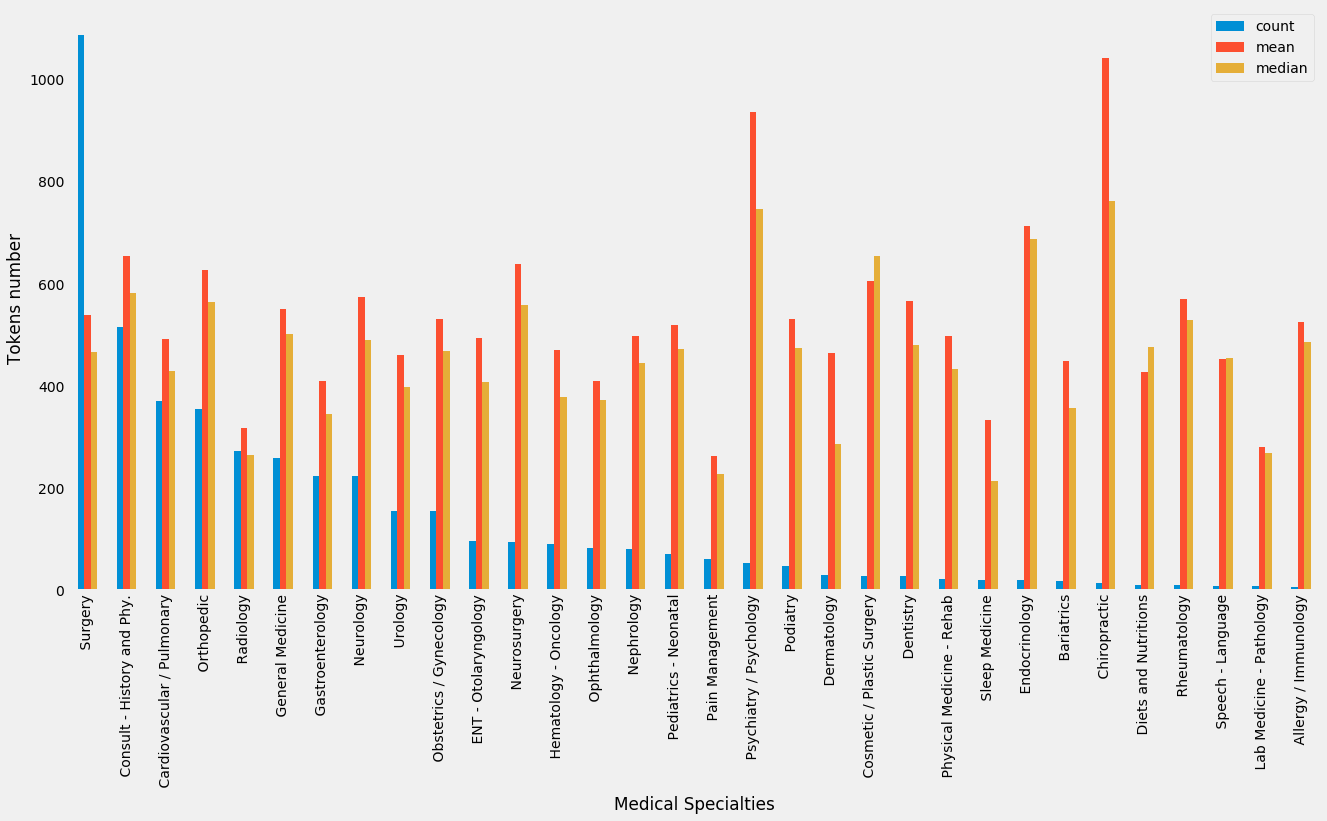

In [34]:
# A good snapshot: in our corpus there is a great number of texts for Surgery, but for practices like Psychiatry and 
#Immunology very few. Nonetheless, mean and median of tokes are high for those categories, which means that the corpora
#are long
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Tokens number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)

In [35]:
#Decided to group some categories in sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [36]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep and Pain', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Lab Medicine - Pathology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' Diets and Nutritions',
       ' Dermatology', ' Cosmetic / Plastic Surgery',
       ' Consult - History and Phy.', ' Chiropractic'], dtype=object)

In [37]:
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 Psychiatry / Psychology         53
 Podiatry                        47
 Dermatology                     29
 Dentistry                       27
 Cosmetic / Plastic Surgery      27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions            10
 Rheumatology               

In [38]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep and Pain', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Lab Medicine - Pathology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' Diets and Nutritions',
       ' Dermatology', ' Cosmetic / Plastic Surgery',
       ' Consult - History and Phy.', ' Chiropractic'], dtype=object)

In [39]:
# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language          

In [40]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology   

In [41]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [42]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology             7
Name: medical_specialty, dty

In [43]:
# Final count of medical specialties (for now)
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

27

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4514 non-null   object
 1   medical_specialty  4514 non-null   object
 2   sample_name        4514 non-null   object
 3   transcription      4514 non-null   object
 4   tokenized_sents    4514 non-null   object
 5   post_stopwords     4514 non-null   object
 6   tokens             4514 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 442.1+ KB


In [45]:
#Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of tokens
data= data[(data['tokens'] >= 250) & (data['tokens'] <= 1000)]
print(data['tokens'].min())
print(data['tokens'].max())

250
1000


In [46]:
data['medical_specialty'].nunique()

27

In [47]:
data['medical_specialty'].value_counts()

 Surgery                       786
 Consult - History and Phy.    403
 Orthopedic                    250
 Cardiovascular / Pulmonary    239
 Neurologists                  227
 General Medicine              202
 Gastroenterology              146
 Radiology                     139
 Obstetrics / Gynecology       111
 Urology                       104
 ENT - Otolaryngology           67
 Hematology - Oncology          62
 Ophthalmology                  61
 Pediatrics - Neonatal          59
 Nephrology                     57
 SKIN cosmetics                 44
 Sleep and Pain                 33
 Psychiatry / Psychology        31
 Podiatry                       28
 Dentistry                      26
 Physical Therapy               22
 Dietetics                      22
 Endocrinology                  15
 Rheumatology                    9
 Speech - Language               7
 Allergy / Immunology            5
 Pathology                       5
Name: medical_specialty, dtype: int64

In [48]:
data['medical_specialty'].value_counts()

 Surgery                       786
 Consult - History and Phy.    403
 Orthopedic                    250
 Cardiovascular / Pulmonary    239
 Neurologists                  227
 General Medicine              202
 Gastroenterology              146
 Radiology                     139
 Obstetrics / Gynecology       111
 Urology                       104
 ENT - Otolaryngology           67
 Hematology - Oncology          62
 Ophthalmology                  61
 Pediatrics - Neonatal          59
 Nephrology                     57
 SKIN cosmetics                 44
 Sleep and Pain                 33
 Psychiatry / Psychology        31
 Podiatry                       28
 Dentistry                      26
 Physical Therapy               22
 Dietetics                      22
 Endocrinology                  15
 Rheumatology                    9
 Speech - Language               7
 Allergy / Immunology            5
 Pathology                       5
Name: medical_specialty, dtype: int64

In [49]:
print(data['tokens'].min())
print(data['tokens'].max())

250
1000


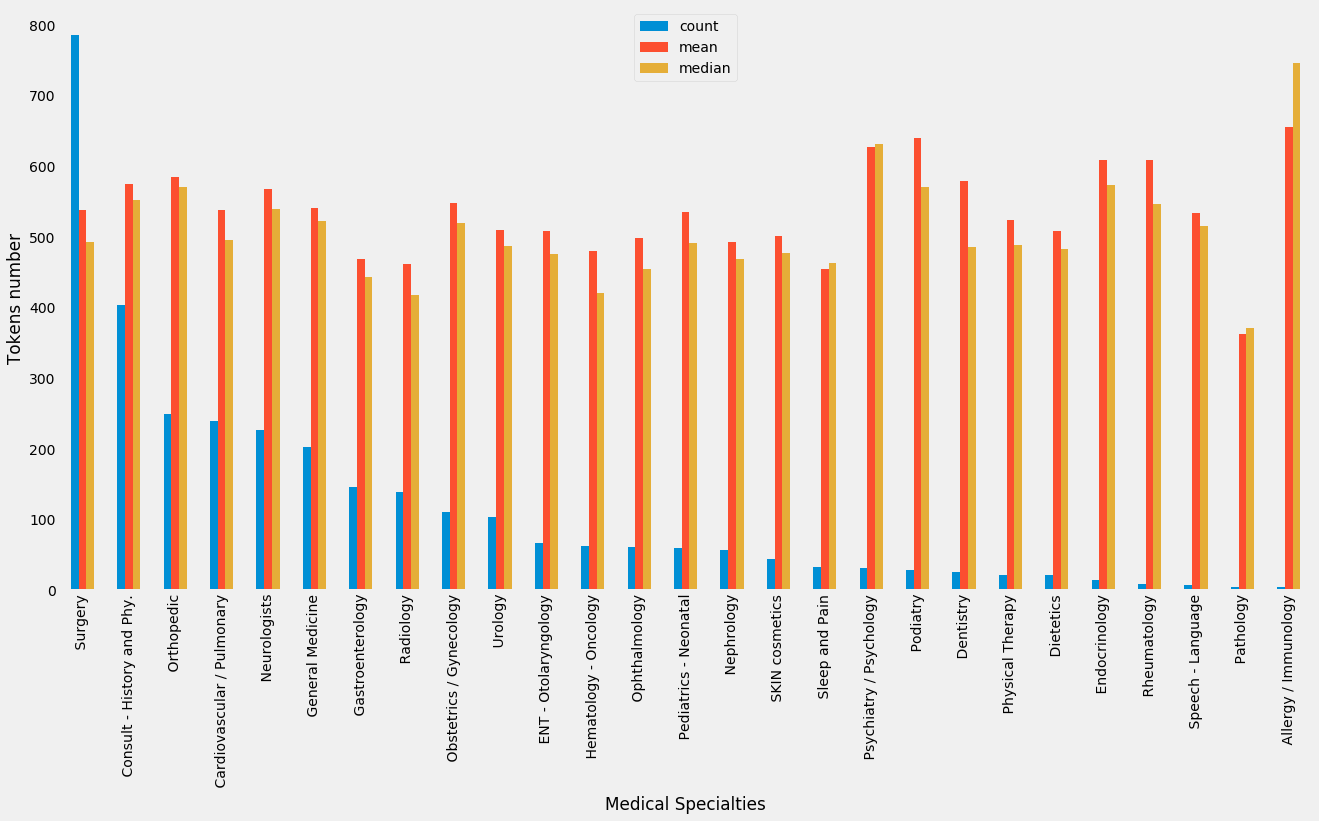

In [50]:
# Cleaned snapshot
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Tokens number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('Corpus view')

In [51]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,786,537.575064,493.0
Consult - History and Phy.,403,574.253102,552.0
Orthopedic,250,585.248000,571.0
Cardiovascular / Pulmonary,239,537.619247,495.0
Neurologists,227,568.374449,540.0
General Medicine,202,541.148515,522.5
Gastroenterology,146,468.068493,442.5
Radiology,139,460.899281,418.0
Obstetrics / Gynecology,111,547.648649,519.0


In [52]:
del data['sample_name']

In [53]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens
1822,"Excision of neuroma, third interspace, left f...",Podiatry,"preoperative diagnosis morton's neuroma, third...","['preoperative', 'diagnosis', 'morton', ""'s"", ...","[preoperative, diagnosis, morton, 's, neuroma,...",400
1548,MRI T-spine: Metastatic Adenocarcinoma of the...,Radiology,"ccble weakness and numbness.,hx this y/o rhm w...","['ccble', 'weakness', 'and', 'numbness.', ',',...","[ccble, weakness, numbness., ,, hx, y/o, rhm, ...",675
4079,Left upper extremity amputation. This 3-year...,SKIN cosmetics,preoperative diagnosis left upper extremity am...,"['preoperative', 'diagnosis', 'left', 'upper',...","[preoperative, diagnosis, left, upper, extremi...",396
4462,Dietary consultation for diabetes during preg...,Consult - History and Phy.,subjective this is a 28-year-old female who c...,"['subjective', 'this', 'is', 'a', '28-year-old...","[subjective, 28-year-old, female, comes, dieta...",703
2865,"Intractable epilepsy, here for video EEG.",Neurologists,"chief complaint intractable epilepsy, here fo...","['chief', 'complaint', 'intractable', 'epileps...","[chief, complaint, intractable, epilepsy, ,, v...",977


In [54]:
from collections import Counter
dictionary= data["post_stopwords"].transform(lambda x: Counter(x)).sum()
dictionary

Counter({'past': 1709,
         'medical': 1372,
         'history': 6275,
         'difficulty': 799,
         'climbing': 11,
         'stairs': 36,
         ',': 102521,
         'airline': 4,
         'seats': 4,
         'tying': 28,
         'shoes': 10,
         'used': 2361,
         'public': 13,
         'seating': 7,
         'lifting': 52,
         'objects': 49,
         'floor': 170,
         '.': 82712,
         'exercises': 43,
         'three': 639,
         'times': 454,
         'week': 497,
         'home': 677,
         'cardio': 11,
         'walking': 144,
         'two': 1423,
         'blocks': 17,
         'five': 216,
         'flights': 2,
         'snoring': 43,
         'muscle': 959,
         'joint': 750,
         'pains': 49,
         'including': 684,
         'knee': 721,
         'pain': 3156,
         'back': 1587,
         'foot': 586,
         'ankle': 378,
         'swelling': 398,
         'gastroesophageal': 90,
         'reflux': 155,
        

In [55]:
for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])


, 102521
. 82712
patient 15931
: 13041
left 7483
right 7341
history 6275
procedure 5259
placed 4996
normal 4197
well 3802
pain 3156
using 2792
anesthesia 2740
skin 2683
incision 2608
performed 2554
removed 2531
blood 2493
also 2487
room 2479
noted 2463
used 2361
without 2340
's 2306
time 2258
diagnosis 2176
anterior 2034
taken 1995
) 1969
artery 1929
mg 1904
( 1854
position 1845
general 1816
past 1709
fashion 1702
closed 1689
operating 1649
chest 1646
area 1641
postoperative 1636
made 1616
upper 1602
back 1587
lower 1571
preoperative 1557
posterior 1519
2 1486
vicryl 1480
1 1480
good 1478
neck 1464
lateral 1458
sterile 1457
x 1449
abdomen 1447
present 1441
pressure 1436
approximately 1432
two 1423
tissue 1397
surgery 1392
one 1377
medical 1372
given 1355
obtained 1352
medications 1345
prepped 1339
suture 1331
disease 1322
significant 1308
draped 1302
cm 1281
dr. 1280
heart 1271
complications 1241
loss 1232
small 1232
denies 1227
clear 1227
examination 1226
catheter 1223
stable 1221
dis

axillary 221
oblique 221
addition 220
drains 220
sensation 220
tubes 220
degenerative 220
edges 219
esophagus 219
medially 219
erythema 219
diffuse 219
number 219
improved 218
movements 218
normocephalic 218
physician 218
pregnancy 218
testing 217
five 216
anastomosis 216
betadine 216
delivered 216
sutured 216
distress. 216
feet 216
process 215
adhesions 215
instructions 214
copiously 213
ml. 213
limited 212
catheterization 212
numbness 212
way 211
anteriorly 211
structures 211
effusion 211
complex 210
cyanosis 210
based 210
check 210
clamp 209
ii 209
routine 209
positioned 209
allow 209
node 209
bit 209
chills 208
foreign 208
apparent 208
third 207
problem 207
peritoneum 207
creatinine 207
extending 207
pleural 207
introduced 206
stage 206
awakened 206
remained 206
response 206
trachea 205
outpatient 205
ligated 205
healthy 204
worse 204
dilated 204
o'clock 203
condition. 203
poor 202
cranial 202
died 202
junction 202
focal 202
frontal 202
infiltrated 201
segment 201
fluids 201
recomm

bruits 110
couple 109
2.5 109
lot 109
fistula 109
accomplished 109
metastatic 109
gently 109
involved 109
indicated 109
hard 109
retractors 109
alignment 109
cortical 109
hemostatic 109
connected 108
experienced 108
inflammation 108
labs 108
well-nourished 108
man 108
mobilized 108
mucosal 108
encountered 108
left. 108
patellar 108
bronchoscope 108
sinuses 108
stopped 107
________ 107
fully 107
suprapubic 107
clips 107
immediate 107
esmarch 107
fold 106
pmh 106
cold 106
cooperative 106
showing 106
freed 106
appointment 106
arch 106
decision 106
window 106
try 106
cement 106
tonsillar 106
otitis 106
jugular 106
incontinence 105
preop 105
bacitracin 105
fall 105
dyspnea 105
parietal 105
dysphagia 105
rubs 105
written 105
demonstrates 105
linear 105
probable 105
tms 105
meniscus 105
form 104
contents 104
inflammatory 104
hematuria 104
loop 104
analysis 104
palpitations 104
enlargement 104
mass. 104
iii 104
changed 104
extraction 104
consider 104
wedge 104
fentanyl 104
90 104
irregular 103

borderline 70
aphasia 70
uihc 70
drop 69
abnormality 69
glans 69
young 69
cephalad 69
ventral 69
hypertrophy. 69
plans 69
resulting 69
seem 69
vena 69
gravida 69
fibroid 69
suspected 69
doses 69
pituitary 69
coughing 69
0. 69
sugar 68
enhancement 68
rhonchi 68
shaved 68
healed 68
together 68
problems. 68
adenopathy. 68
diplopia 68
viable 68
refractory 68
penrose 68
paraspinal 68
lesions. 68
syringe 68
model 68
hold 68
paracentesis 68
angioplasty 68
bronchus 68
son 68
gradient 68
hallucinations 68
syncope 68
events 68
inner 67
fresh 67
request 67
entirety 67
toward 67
trying 67
epigastric 67
harmonic 67
guarding 67
+ 67
arms 67
dilatation 67
roots 67
sacral 67
secretions 67
gestational 67
paroxysmal 67
candidate 66
consulted 66
widely 66
rather 66
end-stage 66
power 66
cystoscope 66
hyperlipidemia 66
reduce 66
sphincter 66
days. 66
wide 66
surfaces 66
limbus 66
canals 66
rib 66
condyle 66
years. 66
records 66
optic 66
ulceration 66
cheek 66
smokes 65
drift 65
ligation 65
index 65
bronch

apgars 46
hours. 46
temporalis 46
anchor 46
circumference 46
portals 46
hemodynamic 46
ganglion 46
chair 46
consciousness 46
albumin 46
lightheadedness 46
rehab 46
enhancing 46
ambulation 46
osseous 46
source 46
< 46
smear 46
right-handed 46
rhm 46
fasciculations 46
rhinitis 46
unsuccessful 45
compressive 45
bactrim 45
freely 45
understand 45
coagulated 45
prescriptions 45
febrile 45
right. 45
group 45
amputation 45
suffered 45
alone 45
delay 45
successfully 45
infiltration 45
chordee 45
release. 45
pen 45
bmp 45
pertinent 45
planning 45
interstitial 45
initiated 45
selected 45
kocher 45
antebrachial 45
myringotomy 45
pericardium 45
outlined 45
arthroplasty 45
pins 45
segmental 45
triangle 45
presently 45
develop 45
improving 45
sacroiliac 45
tearing 45
radiographs 45
walker 45
2mg 45
methotrexate 45
ascites 45
hypokinesis 45
hemoptysis 45
c3-c4 45
intervertebral 45
fibrillations 45
low-grade 45
nonsignificant. 45
groups 44
things 44
patient. 44
crp 44
50-year-old 44
retention 44
55-ye

telemetry 34
eyelids 34
sterilization. 34
laryngoscope 34
polyethylene 34
respect 34
cartilages 34
metal 34
pulley 34
smoothed 34
vestibular 34
vesicouterine 34
boot 34
excisional 34
subscapularis 34
cerebellum 34
agreement 34
auricular 34
yellow 34
markings 34
l2 34
reactions 34
chance 34
calcaneal 34
terminal 34
angio-seal 34
echo 34
done. 34
colonoscope 34
moment 34
attenuation 34
helpful 34
minute. 34
transthoracic 34
agitated 34
pp 34
2bun 34
multivitamin 34
phosphatase 34
well-child 34
cyanosis. 34
overweight 33
bad 33
transversely 33
3-4 33
withdrew 33
stents 33
mainstem 33
elective 33
omeprazole 33
lortab 33
invasive 33
77-year-old 33
standpoint 33
scissor 33
x2. 33
assistant 33
follows 33
glasses 33
ureteropelvic 33
devices 33
100. 33
unlikely 33
hospitalist 33
lma. 33
tie 33
agents 33
injured 33
approximation 33
keflex 33
intraabdominal 33
undermined 33
babcock 33
manner. 33
plug 33
palsy 33
coverage 33
orders 33
cysts 33
reservoir 33
revealing 33
rubber 33
infused 33
lowered

lobe. 26
drive 26
electrodes 26
extensively 26
pulsatile 26
vitrectomy 26
vigorous 26
nursery 26
well-padded 26
superotemporal 26
stapes 26
manipulator 26
et 26
existing 26
clock 26
crescent 26
54-year-old 26
parapatellar 26
plateau 26
valgus 26
abduction 26
mirror 26
midas 26
vestibule 26
resulted 26
subxiphoid 26
house 26
styloid 26
visits 26
spine. 26
ventricles 26
tapped 26
week. 26
radiofrequency 26
nodes. 26
cart 26
cataracts 26
clearance 26
distracted 26
brow 26
accident. 26
dentition 26
rightward 26
parenchymal 26
palpate 26
anatomical 26
lingual 26
rao 26
flexure 26
bifurcates 26
cabg 26
sphenoid 26
await 26
occurring 26
responded 26
spell 26
sulfa 26
worsen 26
lucid 26
intolerance 26
deficits. 26
arrangements 26
meningioma 26
questioning 26
gotten 26
insomnia 26
4.chloride 26
big 25
carbohydrates 25
4-mm 25
collar 25
subplatysmal 25
isthmus 25
shower 25
unless 25
him. 25
assured 25
significant. 25
technical 25
putting 25
moist. 25
sweep 25
crossing 25
retroperitoneum 25
organ

entrance 20
encircled 20
instillation 20
slit 20
documentation 20
generic 20
ureteroscopy 20
wheezing. 20
manage 20
grew 20
erythema. 20
osteoarthritis. 20
deflux 20
graspers 20
elavil 20
equipment 20
thresholds 20
settings 20
peritomy 20
localize 20
leaf 20
fetus 20
curetted 20
adenoidectomy. 20
focus 20
hiatus 20
filter 20
hulka 20
isolate 20
methylmethacrylate 20
gluteus 20
acetabular 20
teeth. 20
anchors 20
antecubital 20
inflow 20
crepitus 20
apposition 20
8-mm 20
sought 20
rex 20
reach 20
lie 20
reciprocating 20
16. 20
synchromed 20
28-year-old 20
proceeding 20
neuroma 20
leksell 20
awaiting 20
argon 20
arthritic 20
irregularly 20
converted 20
beach 20
arteriosus. 20
friable 20
ox. 20
discolored 20
diseased 20
conchal 20
consumption 20
frontotemporal 20
fibroids 20
calcaneus 20
cystotome 20
trailing 20
known. 20
massage 20
1.6 20
orif 20
pollicis 20
hemiarthroplasty 20
gaining 20
avascular 20
circle 20
palate. 20
acquired 20
mammography 20
nasolacrimal 20
dizziness. 20
pharyngeal

voluntary 16
dear 16
reversal 16
deceased 16
urine. 16
answered. 16
wall. 16
hyperplasia 16
channel 16
82-year-old 16
pyelograms 16
chocolate 16
kg. 16
emergently 16
ta 16
twist 16
violation 16
modest 16
prostatectomy 16
hopes 16
foul 16
exchange. 16
degrees. 16
gerota 16
bridges 16
erection 16
ventrum 16
preserving 16
operate 16
refusing 16
functioning 16
gastroenterology 16
diagnosis. 16
orchiopexy 16
testis. 16
inhalational 16
bottom 16
rapide 16
testes. 16
benzoin 16
tack 16
electrocautery. 16
suturing 16
phimosis 16
endoshears 16
ligating 16
______ 16
hydrocele. 16
penoscrotal 16
72-year-old 16
labored 16
sensitive 16
enalapril 16
reasonably 16
hydronephrosis. 16
2.7 16
criteria 16
1to 16
develops 16
point. 16
board 16
checkup 16
helping 16
gun 16
materials 16
restriction 16
cordis 16
inferotemporal 16
sclerotomy 16
atropine 16
hence 16
curettage. 16
protruding 16
1-year-old 16
fcu 16
ocuflox 16
fimbriated 16
incus 16
paramedian 16
radiograph 16
intra-abdominal 16
mris 16
kit 16
m

recurred 14
unresponsive. 14
strain 14
examvital 14
dysarthria. 14
labetalol 14
centrum 14
diplopia. 14
rica 14
neutropenia 14
q. 14
2/3 14
pick 14
100mg 14
type. 14
pmh1 14
ambulance 14
lexiscan 14
lanoxin 14
mmse 14
radiculopathies 14
improves 14
worrisome 14
hilar 14
marital 14
discontinuing 14
noncompliance 14
child. 14
anxiety. 14
actos 14
gallop. 14
nondrinker 14
currently. 14
sepsis. 14
nontoxic 14
topamax 14
pes 14
7respirations 14
tetracycline 14
self-breast 14
colposcopy 14
sprays 14
finger-to-nose 14
myeloma 14
holter 14
toprol-xl 14
impulse 14
palpitations. 14
obtunded 14
splinter 14
public 13
highest 13
letter 13
worker 13
bariatric 13
consumes 13
bearing 13
mention 13
tobacco. 13
attorney 13
involuntary 13
meeting 13
balloon. 13
spanish 13
nonviable 13
acmi 13
bank 13
enlarge 13
ischial 13
levator 13
diet. 13
confrontation 13
_________ 13
embolus 13
epithelial 13
urinate 13
intrarenal 13
tapping 13
hemoclips 13
worried 13
q.i.d 13
maryland 13
virtually 13
action 13
openin

ss2 12
ivig 12
shimada 12
doxorubicin 12
recently. 12
radiologic 12
lymphatics 12
dimpling 12
7blood 12
ketones 12
sweating 12
h.s. 12
suprascapular 12
remission 12
temodar 12
non-small-cell 12
normalization 12
systemsgeneral 12
s4 12
lovastatin 12
sprints 12
01/07/09 12
colitis. 12
consumed 12
climbing 11
cardio 11
chicken 11
roux-en-y 11
bougie 11
og 11
on. 11
nevertheless 11
blunted 11
8blood 11
psychologist 11
3.6 11
bupivacaine 11
w 11
adjustment 11
better. 11
vasectomy 11
securing 11
volumes 11
ivp 11
alleviate 11
trigone 11
path 11
planning. 11
12.0 11
straightened 11
cystourethroscopy. 11
sensitivity. 11
waking 11
significance 11
probability 11
backwards 11
bumps 11
98.4 11
ss 11
whose 11
14potassium 11
grown 11
sincerely 11
representative 11
herniorrhaphy. 11
sac. 11
0-degree 11
injure 11
nighttime 11
zosyn 11
mortality 11
post-op 11
delineated 11
hump 11
aborted 11
analysis. 11
meatal 11
loosened 11
supposed 11
vicodin. 11
dehydration. 11
sex 11
spasm. 11
spacers 11
complaint

entrapping 10
registered 10
potentials 10
orbitozygomatic 10
synostosis 10
fronto-orbital 10
timi-3 10
intra-anal 10
colpocleisis 10
screening. 10
habit 10
them. 10
tailor 10
ultram 10
bounding 10
bare-metal 10
large-caliber 10
lvef 10
profunda 10
ekg. 10
titrate 10
femoris 10
dispositioned 10
issues. 10
tibiotalar 10
limp 10
parents. 10
adenoidal 10
one-layer 10
entropion 10
picking 10
cooled 10
p. 10
superolateral 10
severe. 10
resection. 10
planovalgus 10
talocalcaneal 10
nonetheless 10
c4-cc5-c6 10
subtest 10
accurately 10
mets 10
items 10
2000. 10
contributed 10
symmetric. 10
sleepiness 10
nights 10
arousal 10
opiate 10
opiates 10
disruption 10
nasonex 10
infections. 10
retinas 10
sed 10
accommodation. 10
sedimentation 10
hesitate 10
nonproductive 10
trazodone 10
tinel 10
discoid 10
hydrocortisone 10
ambulated 10
zoster 10
proteinuria 10
arthralgias 10
sr 10
ovale 10
girlfriend 10
comprehend 10
defective 10
ataxia. 10
acid. 10
imaging. 10
a-fib 10
intracapsular 10
airplane 10
b1fo

diuretic 8
descent 8
tagging 8
transversalis 8
bothersome 8
fossae 8
packets 8
torsion. 8
2-week 8
poured 8
torsed 8
supra-dartos 8
recreated 8
shunts 8
adhesives 8
ur6 8
vaporization 8
verumontanum 8
opsite 8
hydroceles 8
organisms 8
reiterate 8
relocation 8
nesbit 8
buck 8
buttonholed 8
beaver 8
periurethral 8
asymmetric 8
multivitamin. 8
s2. 8
tramadol. 8
happening 8
employment 8
quick 8
ioban 8
onset/frequency 8
1992. 8
98.6 8
sebaceous 8
questionnaire 8
macrodantin 8
narrowing. 8
architecture 8
repeating 8
radiographically 8
template 8
cultured 8
anticoagulated 8
retracting 8
approved 8
winter 8
angiocath 8
relieving 8
apparent. 8
saying 8
terminate 8
seeking 8
choose 8
condyloma 8
uncle 8
globally 8
18-inch 8
tendinous 8
intraarticularly 8
sided. 8
excellent. 8
indermil 8
reservoir. 8
hydrocephalus. 8
uninterrupted 8
inferotemporally 8
patched 8
endolaser 8
ffp 8
aqueductal 8
aesculap 8
chloraprep 8
separator 8
uteroovarian 8
leafs 8
tones. 8
saliva 8
finish 8
roth 8
effaced 8
cu

effort. 8
isoenzymes 8
pains. 8
yearly 8
nodules. 8
12.hematocrit 8
diaphragm. 8
swings. 8
weekly. 8
januvia 8
icd 8
gluten-free 8
budget 8
recognizing 8
transumbilical 8
supermorbid 8
pulmozyme 8
seating 7
lowest 7
cheese 7
anastomosis. 7
joined 7
medialization 7
ringers 7
coursemri 7
+1 7
comorbidities. 7
consultations 7
dietician 7
socket 7
hungry 7
cauterized. 7
scds 7
nystatin 7
passively 7
voided 7
cystoscopic 7
orchiectomy 7
sling. 7
smelling 7
prostatitis 7
mesh. 7
cipro. 7
pneumococcal 7
examinationheent 7
robotic-assisted 7
notably 7
hemorrhoidal 7
pharyngitis. 7
8respiratory 7
er. 7
myalgias 7
nourished. 7
tums 7
well-appearing 7
grabbed 7
14.hematocrit 7
resuscitation 7
smokers 7
10-day 7
post-operative 7
vesicle 7
stimulate 7
pinched 7
aseptically 7
63-year-old 7
reevaluated 7
adhesiolysis 7
extubation 7
electively 7
onlay 7
reiterated 7
sizeable 7
polydek 7
bulbar 7
replacements. 7
drinking. 7
drink. 7
34. 7
warts 7
fevers. 7
0.0guidewire 7
predominant 7
culture. 7
flutte

initiating 6
atypical/dysplastic 6
extrarenal 6
tuberculation 6
doctors 6
12-french 6
cupful 6
florida. 6
0.0glidewire 6
holmium 6
phallus. 6
plastibell 6
worry 6
30-gauge 6
crystalloids 6
priapism 6
24. 6
grid 6
arrives 6
hyperplastic 6
muscularis 6
aldosterone 6
paper 6
coapted 6
6-cm 6
gouty 6
hand-assisted 6
nonfunctioning 6
gelport 6
trocar. 6
clips. 6
tcompression 6
vvir 6
____ 6
120. 6
ohms 6
millivolts. 6
peribulbar 6
supranasal 6
pre-placed 6
soft-tip 6
collagen 6
difficultly 6
port. 6
shaven 6
neuropen 6
macrocephaly 6
cornu 6
lahey 6
vacuum-assisted 6
120s 6
100s 6
particles 6
net 6
q.12h 6
10-1/2 6
10-week 6
tractioned 6
bifid 6
blighted 6
ovum 6
osborne 6
forcep 6
retraction. 6
hourglass 6
accompanying 6
indicationsthis 6
primed 6
episcleral 6
coagulating 6
bursitis. 6
tympanosclerosis 6
tympanoplasty 6
excruciating 6
arthrosis. 6
r-k 6
llevel 6
probe. 6
suffer 6
cefazolin 6
14-french 6
extension. 6
supporting 6
trache 6
stats 6
rubbery 6
denuded 6
pcl 6
weck-cel 6
0.force

omohyoid 6
c2-c3. 6
vector 6
cand 6
zephyr 6
platysmus 6
surgiflo 6
malleted 6
mystique 6
enclosed 6
overgrowth 6
dura. 6
c6-ccervical 6
c5-c7 6
endplate-to-endplate 6
adenotonsillectomy 6
peritonsillar 6
peritenon 6
transition 6
attempt. 6
quarter 6
channels 6
yes/no 6
safety. 6
sacrocolpopexy 6
usage. 6
symbol 6
direction. 6
biting 6
intelligible 6
teaching 6
hands-free 6
protocol. 6
valleculae 6
hypopnea 6
11:00 6
estimate 6
apnea/hypopnea 6
mononeuritis 6
57. 6
globulin 6
oxyhemoglobin 6
gabapentin. 6
apneic 6
v/q 6
high-resolution 6
unwell 6
weather 6
swimming 6
afferent 6
dad. 6
everybody 6
antinuclear 6
psoriatic 6
celexa 6
bumex 6
alopecia 6
oligoarticular 6
98.weight 6
ii. 6
empiric 6
vegetations 6
enlargement. 6
multiplane 6
vegetation 6
m/sec 6
tr 6
mcg/kg/minute 6
loc 6
5/4 6
wnl. 6
hemidiaphragm 6
pneumothoraces 6
paucity 6
purely 6
claimed 6
indomethacin 6
ipratropium 6
2+/in 6
nt 6
130/and 6
tolerance. 6
lunate 6
32 6
images. 6
t6 6
intratendinous 6
nigeria 6
t-l-spine 6

adequate. 5
tracks 5
thrive 5
shared 5
pth 5
overlaid 5
functions 5
discretion 5
x-ray. 5
doctor. 5
immobilize 5
44-mm 5
consents 5
pinna 5
magerl 5
c1 5
precontoured 5
decorticating 5
approaches 5
1800 5
violence 5
4mm 5
floating 5
mine 5
cpm 5
leukemia 5
pulsavac 5
nissen 5
teds 5
profundus 5
contiguous 5
flaring 5
daughters 5
dic 5
excised. 5
protrude 5
generous 5
cut. 5
vestibules 5
refractured 5
compressing 5
equalizing 5
processed 5
dysmorphic 5
psychiatrically 5
professional 5
chemotherapy. 5
glistening 5
seeding 5
resections 5
rhizotomy 5
boney 5
skribe 5
fluid-filled 5
vicoprofen 5
confines 5
hypoplasia 5
l2-3. 5
l3-4. 5
6-inch 5
l4-l3-4 5
informing 5
medialized 5
exhibiting 5
puncture. 5
profoundly 5
seat 5
left-hand 5
2-year 5
inadvertently 5
1.5-inch 5
emla 5
glucose. 5
externalized 5
vaginally 5
intervening 5
transaminases. 5
contracted 5
colonization. 5
op 5
grow 5
mp 5
postponed 5
salpingectomy 5
boundaries 5
chose 5
seemingly 5
ala. 5
l1-l2 5
suprafascial 5
backed 5
bif

prentiss 4
tension. 4
sub 4
poupart 4
tissues. 4
remnant. 4
ring. 4
microhematuria 4
rbcs 4
nonobstructing 4
etiologies 4
neuromodulator 4
verbalize 4
mid-prostate 4
2200was 4
re-assessment 4
preop. 4
one-and-a-half 4
cared 4
apices 4
grenade 4
relax 4
bassini 4
conjoined 4
0.was 4
phimosis. 4
reducible 4
magnet 4
dribbling 4
compliance. 4
perfix 4
marlex 4
phs 4
strangulate 4
capturing 4
both. 4
asis 4
peon 4
,700 4
14-1/2-year-old 4
sizable 4
corporal 4
eroded 4
17-month-old 4
artifical 4
attach 4
urethroplasty 4
neomeatus 4
6-month-old 4
byers 4
depend 4
upside 4
recollect 4
chf. 4
impediment 4
3inr 4
dynamite 4
travels 4
son. 4
consult. 4
allergiespatient 4
fissures 4
firm. 4
ben 4
ceftazidime 4
uncircumcised 4
fortaz 4
fulgurate 4
27-french 4
trilobar 4
trimming 4
tis 4
cystoscopies 4
followups 4
contamination 4
stromal 4
vesicoureteral 4
gaping 4
offset 4
landmark 4
daughter-in-law 4
prostatism. 4
transurethrally 4
t1c. 4
rows 4
17-gauge 4
urinating 4
khan 4
gomco 4
priapism. 4
c

attain 4
reloaded 4
glycol 4
carlos 4
abandoned 4
vertebra. 4
kyphoplasty. 4
sedative 4
derangement 4
unaffected 4
spigot 4
cocktail 4
disabling 4
methacrylate 4
t1l2 4
hv-r 4
11-gauge 4
tamp 4
radiopaque 4
tvertebral 4
0.to 4
below-the-knee 4
one-eighth-inch 4
2the 4
juxtarenal 4
repaired. 4
leak. 4
keratoplasty. 4
09/0 4
aphakia. 4
7.5-mm 4
trephine 4
synechiae 4
27759 4
900. 4
transitioned 4
subtrochanteric 4
85-mm 4
uremia. 4
awful 4
8-inch 4
masticatory 4
models 4
ilium 4
palatine 4
re-contoured 4
08/30/2003 4
perm-a-cath 4
scrubbing 4
peroxide 4
998.59 4
mid-shaft 4
shortening. 4
concrete 4
alignment. 4
mature 4
measured. 4
1:20,000 4
loosen 4
troubles 4
introduction 4
hysteroscopic 4
hagar 4
diagnoses1.stage 4
pain.,2.status 4
parous 4
enterolysis 4
peristalsis 4
ringer 4
ringer's. 4
coils 4
bullosa 4
complicating 4
matters 4
addressing 4
para-aortic 4
straw-colored 4
thighthis 4
boat 4
systemscardiac 4
ssor 4
skinning 4
vulvectomy. 4
tapes 4
bicep 4
systemically 4
branchial 4
b

28y/o 4
99.and 4
0.5mm 4
commands. 4
medicine. 4
toxoplasmosis 4
75mg 4
transiently 4
occasion. 4
thalamic 4
hypophonic 4
ccprogressive 4
46y/o 4
holocranial 4
500mg 4
19by 4
planus 4
hns 4
foamy 4
nuclei 4
hxthe 4
screaming 4
min 4
postictal 4
200mg 4
uncal 4
intellect 4
4/and 4
1/16/9she 4
remembered 4
pud 4
2/9she 4
anosmic 4
20/to 4
20/400 4
planum 4
olfactory 4
sinuses. 4
encasement 4
enhances 4
scotomata 4
1over 4
qid 4
mgf 4
1970s 4
dysynergia 4
10/18/9revealed 4
v-p 4
99mg/dl 4
septated 4
8.2 4
cedars-sinai 4
end-systolic 4
avl 4
v6 4
baseline. 4
3to 4
ah 4
1ms 4
4ms 4
2ms 4
svt. 4
extrastimuli 4
vt. 4
hxy/o 4
voltaren 4
arteritis 4
noncalcified 4
intensity-modulated 4
radiosensitive 4
uncertainty 4
constraints 4
physics 4
59. 4
composed 4
heterogeneously-dense 4
fibroglandular 4
benign-appearing 4
birads 4
fda-approved 4
29/on 4
biometry 4
3g 4
survey 4
choroid 4
plexuses 4
four-chamber 4
monochorionic 4
transvaginal 4
ls 4
frequencies 4
flickering 4
lateralizing 4
abruptly 4


axillae 4
capable 4
fremitus. 4
hyperresonance 4
ss4 4
homan 4
bulla 4
graded 4
short- 4
communicative. 4
hemoccult-negative 4
palms 4
straight-leg 4
rational 4
premalignant 4
auscultated. 4
perrl 4
bases. 4
33.and 4
cea 4
normochromic 4
normocytic 4
wedding 4
pruritus. 4
9at 4
prescription. 4
arizona 4
labetalol. 4
11/07. 4
erlanger 4
pneumovax. 4
rales. 4
r. 4
pearly 4
97.6. 4
0.9sodium 4
16calcium 4
2alkaline 4
prerenal 4
200showing 4
clonidine. 4
hematemesis. 4
mylanta 4
bactroban 4
25. 4
1994. 4
epitrochlear 4
infiltrates. 4
carinii 4
pneumovax 4
obtainable 4
sides. 4
amikacin 4
well-known 4
regime 4
thrombocythemia 4
vasopressors 4
appendicectomy. 4
reacting 4
decreased. 4
paresthesias. 4
2calcium 4
historya 4
drives 4
anasarca. 4
off. 4
expresses 4
lift. 4
140/80 4
appendicectomy 4
micardis 4
colchicine 4
attack. 4
klebsiella 4
hyperlipidemia.,1 4
radium 4
3platelets 4
single-vessel 4
two-dimensional 4
12000 4
ethambutol 4
clarithromycin 4
197she 4
atorvastatin 4
elementary 4
dy

8-month-old 3
granuloma. 3
substantially 3
involuted 3
devastation 3
nonaccidental 3
tubeless 3
affixing 3
inhibitors. 3
tiva 3
electronics/robotics 3
metatarsals 3
xi-scan 3
triangulate 3
-shaped 3
orthowedge 3
08/22/2003 3
p.c. 3
heads. 3
flowed 3
pulse-evac 3
floss 3
tracking. 3
radiosurgical 3
obliterate 3
1.2-mm 3
uploaded 3
generate 3
8isodose 3
23.gy 3
2.9ml 3
79 3
approved. 3
1200the 3
dictating 3
ventillation. 3
pseudoaneurysms 3
quality. 3
restoring 3
meager 3
u-clips 3
scans. 3
towels. 3
verity 3
l4and 3
vigilance 3
l3l4and 3
lvisualizing 3
characteristic 3
valid 3
5-day 3
tisseel. 3
four-level 3
instrumention 3
attendant 3
premier 3
neurodiagnostics 3
duraprep. 3
cbut 3
cwhich 3
6x2 3
intoxicated 3
ovary. 3
neoplasms. 3
pseudo 3
afterward 3
esophagoscopy 3
kasai 3
ampule 3
cricopharyngeus 3
parson 3
supraglottis 3
ampulla. 3
duodenoscope 3
adenomatous-appearing 3
wilson-cooke 3
tritome 3
sphincterotome 3
ceased 3
findingsabnormal 3
papilla 3
duct. 3
recommendationsnpo 3
esc

choice. 3
6-8/and 3
12/for 3
18-20/2 3
15-17/28. 3
finger-to-nose. 3
10/15/200 3
munro 3
331.5 3
781.2 3
788.33 3
290.0 3
symptotic 3
enroll 3
capability 3
rigorous 3
carolina 3
closest 3
micro-k 3
outstretched 3
sleepiness. 3
bedside. 3
wheelchair-bound 3
lethargic. 3
5blood 3
92/5after 3
105/58. 3
auscultate. 3
3/2009 3
vasovagal 3
relaxants. 3
dou 3
refill. 3
rolandic 3
eegs 3
cousin 3
kempt. 3
scab 3
96 3
doll 3
19after 3
homogeneous 3
08/0 3
role 3
cruise 3
199but 3
positives 3
exquisitely 3
13th 3
meningismus. 3
veteran 3
toast 3
gyri 3
preexisting 3
blockage 3
improvement. 3
cramp 3
hiv. 3
131/7pulse 3
sidewalk 3
azmacort 3
heme 3
81. 3
4300 3
1.0ptt 3
recognize 3
tap. 3
avapro 3
migraine. 3
simvastatin. 3
experiences. 3
vacation 3
micturition 3
-2in 3
200copd 3
q.aspirin 3
3daily 3
q.lipitor 3
180/1temperature 3
2o2 3
330 3
2co2 3
3.cholesterol 3
17bnp 3
97troponin 3
0.1previous 3
withhypertensive 3
emergency. 3
planmost 3
hjr 3
199which 3
schwannoma 3
half-normal 3
replete 3
c

hemiscrotum. 2
39,000. 2
disintegrated 2
nonabsorbable 2
ancef. 2
cleansed. 2
epididymis. 2
7-1/2-month-old 2
recognizable 2
tease 2
gubernaculum 2
nonexistent 2
calibrating 2
viability 2
reanastomosed 2
strengthened 2
smallest 2
foreskin. 2
re-peritonealized 2
re-approximating 2
direct. 2
bassini. 2
tevdek 2
q.1h 2
anti-cholinergic 2
tur 2
diode 2
side-firing 2
lasering 2
rutkow 2
reinforcing 2
formed. 2
push. 2
imbricated 2
myopectineal 2
monocril 2
indirect. 2
catching 2
thinness 2
aliquot 2
hernial 2
salvaging 2
recreate 2
fournier 2
phimotic 2
disfigurement 2
penectomy 2
pouring 2
,300 2
pen. 2
circumscribe 2
splaying 2
heineke-mikulicz 2
perpetual 2
tit 2
1-1/2-year-old 2
inter-preputial 2
bougie-a-boule 2
deglove 2
demarcation 2
lancet 2
hydrocelectomy. 2
43.hemoglobin 2
4700. 2
4.0. 2
hydrocelectomies 2
x4. 2
tunic 2
jock 2
coude 2
20,000. 2
parkinson's. 2
0.4so 2
triage. 2
15. 2
destroying 2
pipeline 2
sluggishness 2
144/6 2
cauliflower-like 2
incubation 2
condylox 2
c02 2
enu

mini-arthrotomy 2
tendon-to-tendon 2
trusopt 2
30450 2
21235 2
perioperatively 2
puck 2
cymba 2
sandwich 2
generously. 2
trailed 2
metzenbaums 2
bulbous 2
transmucosally 2
double-dome 2
intradomal 2
spanning 2
carved 2
super-tip 2
precision 2
everting 2
charged 2
rhinectomy. 2
intranasally. 2
labeling 2
medial-most 2
strickland 2
associates. 2
3-1/2-4 2
mueller 2
burrows 2
resuspended 2
burrow 2
fertilization 2
traction. 2
xtransected 2
11643 2
14300 2
biopsy-positive 2
eroding 2
diploic 2
marrow-containing 2
bong 2
18cm 2
16cm 2
superficially. 2
recession 2
disinserted 2
26055. 2
,9 2
torr. 2
pulley. 2
torr 2
transperineal 2
forwarded 2
counter-traction 2
interpectoral 2
roman-sandaled 2
classified 2
t3/nx/mx 2
triangles 2
cribriform 2
cloquet 2
12/04/19consisting 2
04/07/198he 2
valvuloplasty 2
1mmhg 2
4systemic 2
right-to-left 2
arborization 2
surgical. 2
aortopulmonary 2
valvuloplasty. 2
annulus. 2
sedentary 2
parametrium 2
pararectal 2
paravesical 2
paravaginal 2
brim 2
,3 2
anter

preemptive 2
15-scalpel 2
blunt-tipped 2
bullet-nose 2
kittner 2
hook-tip 2
dyskinesia 2
heading 2
compressible 2
monophasic 2
tossed 2
endoclose 2
adrenalectomy. 2
bean 2
isolating 2
dumping 2
five-mm 2
non-perforated 2
infra-umbilically 2
appendicis 2
intraloop 2
recesses 2
anesthetized. 2
endoloops 2
grey 2
laminotomy. 2
cerebri. 2
hyperextended 2
7-cm 2
mccullough 2
laminae 2
am-8 2
double-action 2
microforceps. 2
convincingly 2
locating 2
vertebrae. 2
vertebroplasties 2
ttand 2
mixed. 2
plans. 2
1:500,000 2
kneecap 2
reconditioning 2
oxford 2
feeler 2
referenced 2
gaps 2
interdigitation 2
trialed 2
jinnah 2
eburnation 2
sclerosis. 2
solidified 2
constrain 2
l1evels 2
co-morbidities 2
t1l1 2
1/04 2
osteoporotic 2
2/04 2
3/04 2
tfracture 2
tfractures. 2
room/radiology 2
anesthesia/local 2
tpedicles 2
t1a 2
alongside 2
osteointroducer 2
perforations 2
inflatable 2
psi 2
fillers 2
low-pressure 2
filler 2
tools 2
keller 2
bunionectomy. 2
remodeled 2
liston 2
epi. 2
re-inspecting 2
redr

para-1-0-5-1 2
terminations 2
parous. 2
hydro-dissected 2
lengthen 2
back-cut 2
12.2 2
hyperflexion 2
papillomatosis 2
circon 2
12-degree 2
pre-pregnancy 2
tenaculum. 2
douching 2
distending 2
proliferative 2
intraluminal 2
dye. 2
moderated 2
adenomyosis. 2
hydrosalpinx. 2
declined. 2
spongy 2
inconsistent 2
douche 2
second-look 2
0.super-stiff 2
cobra 2
drains. 2
kidneys. 2
re-demonstration 2
precontrast 2
coaxial 2
fluid/hematoma 2
duragel 2
skull-based 2
endonasal 2
expeditiously 2
avitene 2
surgilons 2
plagiocephaly. 2
advancement. 2
horseshoe-shaped 2
roofs 2
chisels 2
rims 2
barrel-staving 2
fastened 2
aortography. 2
cramping-like 2
26milligray. 2
170/mmhg. 2
fills 2
terminates 2
groove. 2
non-obstructive 2
adrenalin 2
uninhibited 2
angioseal. 2
okayed 2
counter-clock 2
deployment 2
angioseal 2
117/with 2
119/9 2
om3 2
marginal. 2
peri 2
condylomas. 2
associated. 2
acuminata. 2
post-bowel 2
lugol 2
monsel 2
shouting 2
truth 2
pools 2
parasites 2
liked 2
vsla 2
probiotic 2
recultu

afos 2
lengthenings 2
frenulectomy. 2
findings/specimen 2
desiccate 2
prone. 2
hilo 2
paramedial 2
links 2
re-infected 2
recurrently 2
multiply 2
knotted 2
chylothorax. 2
infradiaphragmatic 2
lymphangiectasia. 2
transdiaphragmatic 2
dismal 2
chylothorax 2
lymphangiectatic 2
supramesenteric 2
aneurysm-like 2
chyle 2
correctable 2
eviscerated 2
lymphangiectasia 2
tradeoff 2
render 2
universally 2
evisceration 2
excisionally 2
antibiotic-soaked 2
9.0 2
09/19/0 2
xy 2
tucson 2
pose 2
constraint 2
weston 2
thumbs-up 2
corrects 2
jargon 2
automatics 2
perseverate 2
phrase 2
quotient 2
abdominosacrocolpopexy. 2
erogenic 2
unleashed 2
metastasized 2
12/05/08 2
story 2
retelling 2
storytelling 2
maze 2
allotted 2
designs 2
amrs 2
monotonous 2
noise. 2
strategy. 2
solving 2
15-minute 2
abilities. 2
caregiver. 2
promote 2
videostroboscopy 2
12/29/2008 2
18hours 2
12/30/2008 2
07hours. 2
epileptic 2
t3. 2
21-channel 2
9-hz 2
alpha 2
tspike 2
spindles 2
recording. 2
environment. 2
plms 2
obnoxious 

sensory/coord/gait/station/reflexes 2
penil 2
7/17/ 2
bp144/7hr5rr20 2
36.0 2
1/17/199did 2
6/5.5 2
light-near 2
gag-shrug 2
pp/vib/prop 2
2+/2 2
frontal/parietal 2
surround 2
inhomogenously 2
pyrimethamine 2
sulfadiazine 2
4:00pm 2
1/8/9when 2
27yrs 2
fhx. 2
36.9c 2
151/9 2
9o2sat. 2
blinked 2
1/+/+corneas 2
winced 2
+/+gag 2
tte 2
dopplers 2
neuroophthalmologic 2
supranuclear 2
1/12-15/revealed 2
effortful 2
neuropsychology 2
7/revealed 2
ftcrp 2
5hdl 2
14she 2
discharged1/19/93. 2
5/2/and 2
fluently 2
lucidly 2
198presented 2
12/9the 2
6/23/revealed 2
temporo-occipital 2
gyral 2
7/19/ 2
7/19/was 2
198including 2
cyclosporin 2
ck=3,1and 2
esr=1on 2
6/28/95. 2
0.6qd 2
caco3 2
50,000units 2
qweek 2
mvi 2
lichen 2
bp160/hrrr35.wt 2
86.4kg 2
elbow/wrist/hand 2
elicited. 2
waddling 2
2/triceps 2
1+/patellae 2
esr= 2
crp1.4 2
2,91ldh 2
35ast 2
6mri 2
8/8/9revealed 2
8/10/which 2
lfb 2
demyelination 2
macrophages 2
oligodendroglia 2
basophilic 2
astrocytes 2
lymphocytic 2
hybridization 2
pi

properties 2
re-localized 2
hypoechoic 2
rapidly-expanding 2
postprocedural 2
re-cleansed 2
secondlook 2
100+ 2
98/mmhg 2
70/palpable 2
84bpm 2
1afebrile 2
fatigued. 2
20meq/l 2
12mg/dl 2
1.0mg/dl 2
30mm/hr 2
nl 2
sg 2
1.0and 2
iu/ml 2
0.9ng/dl 2
2mosm/kg 2
,course 2
24-48hrs 2
2ng/dl 2
cortrosyn 2
6.9ug/dl 2
18.5ug/dl 2
15.5ng/ml 2
fsh 2
lh 2
33ng/dl 2
tursica 2
clinoids 2
24hrs 2
1/1997 2
stroke/tia 2
remembering 2
2/28/9this 2
clerical 2
parish 2
faux 2
pas 2
mishaps 2
decades 2
bp131/7hr7rr136.9c 2
77kg 2
178cm. 2
2/word 2
23words/sec 2
constructive 2
extrapyramidal 2
primitive 2
5.t4 2
7.rpr 2
3/6/9revealed 2
intellectual 2
performances 2
3/6/9showed 2
occipital-parietal 2
regions. 2
4/9his 2
expectation 2
lobes. 2
9/30/9he 2
9/27/9in 2
pile 2
letters 2
curtain 2
concurrently 2
grating 2
perseverated 2
muscatine 2
18items/sec 2
3/6/95. 2
1/3/9he 2
books 2
changes.,1/8/neuropsychological 2
25/ 2
items/sec 2
graphesthesia 2
2/9he 2
pastoral 2
fdg-pet 2
2/14/revealed 2
jljrand 2
erup

humor 2
reads 2
games 2
bicycle. 2
crum 2
cefzil. 2
immunotherapy 2
500/mg 2
04/0 2
maize 2
same-sex 2
opposite-sex 2
07/03. 2
06/04 2
baseball. 2
2200and 2
15respirations 2
23-month-old 2
nebulization. 2
104.4 2
california. 2
checked. 2
soon. 2
delano 2
99.8 2
14respiratory 2
8laying 2
solo 2
10total 2
8crp 2
29.9 2
294,000. 2
3lymphocytes 2
5neutrophils. 2
22-month-old 2
broaden 2
instituted. 2
realize 2
phone. 2
103.6 2
2lymphocytes 2
1monocytes 2
owe 2
aerosols 2
99.3 2
1mg/5 2
ebm 2
lib 2
preemie. 2
iron. 2
101.4 2
2/and 2
105/5respiratory 2
markedly. 2
38.7 2
presumptive 2
informant 2
100.1 2
2/he 2
ovale/asd 2
3/4 2
conveyed 2
100.but 2
admit. 2
yellowish-to-green 2
pedialyte. 2
08/23/2006 2
breast-fed 2
gmc 2
chickens 2
frog 2
travel. 2
q.2h. 2
87/4oxygen 2
3.7kg. 2
sleeping. 2
ctap. 2
480,000. 2
2monocytes 2
disease/pulmonary 2
20-hour 2
1-month-26-day-old 2
failure-to-thrive 2
ward. 2
moderately-sized 2
vsd 2
medical/birth 2
gp2 2
elimination 2
syndromes 2
consolable. 2
13res

cmp. 2
unresponsiveness. 2
ucsf. 2
anti-epileptic 2
clobazam 2
oligohidrosis 2
summertime. 2
postictal. 2
kiss 2
resisted 2
lateralized 2
epilepticus 2
maximizing 2
depacon 2
nightmares 2
shamed 2
hiding 2
nervousness 2
northern 2
05/15/0the 2
ect 2
korea. 2
128/80 2
97.4 2
korean 2
examinationmental 2
korea 2
right-left 2
agnosia 2
dysnomia 2
nervesii 2
72y/o 2
6/3/80 2
occipital-nuchal 2
homogenously 2
pineal 2
9/25/8there 2
196/hct 2
19revealed 2
2/14/she 2
2/14/9hct 2
2/25/9these 2
11/21/due 2
generalizing 2
19surgery 2
12/7/9she 2
fronto-temporo-parieto-occipital 2
3/9but 2
photopsias 2
examvisual 2
20/25+1 2
2od 2
chorioretinal 2
foveal 2
flicker 2
21.9 2
30.7 2
6/od 2
10/os 2
infero-temporal 2
2/6/89optic 2
neuropathy/atrophy 2
w/contrast 2
2/13/enhancing 2
w/ 2
w/out 2
4/26/7x3mm 2
19mild 2
courseresection 2
hertel 2
20/6od 2
07/06 2
c-diff 2
10/0end 2
10/07 2
impacting 2
lawn 2
30pk-yr 2
bp158/9hr9rr16 2
wbc14.3k 2
13cl 2
129. 2
fissure/temporal 2
8/31/9right 2
temporo-parieta

examinationweight 2
integuments 2
12/03/0 2
rib. 2
looking. 2
posterior-lateral 2
12,500 2
398,000. 2
12total 2
2.9. 2
bowels. 2
low-oxygen 2
cuban 2
dolobid 2
q.o.d. 2
azulfidine 2
allergiesnone 2
107/80 2
conjuctival 2
palette 2
musculoskelatal 2
stovepipe 2
parimalleolar 2
adema 2
methotrexate. 2
leucovorin 2
calcitriol 2
126/6temperature 2
105.6 2
bicarb 2
34bun 2
2.3calcium 2
apnea.,1 2
hysterectomy.,1 2
paradox 2
h.,1 2
zegerid 2
percodan 2
duragesic. 2
139/5pulse 2
135. 2
feeds. 2
shadyside 2
a.c. 2
levemir 2
inrs 2
rehabilitation. 2
fibrillation.,1 2
claudication. 2
199rare 2
miacalcin 2
ivcv 2
29,000 2
187,000. 2
1.random 2
2.troponin 2
0.404 2
8200. 2
150/with 2
1-2/6 2
exceedingly 2
metered-dose 2
determinations 2
telemetry. 2
a4 2
forthcoming 2
asian 2
200complaining 2
22000 2
101.diaphoresis 2
pin-sized 2
multinucleated 2
bacilli 2
predominately 2
microfoci 2
intra-alveolar 2
mitis. 2
historypost-streptococcal 2
glomerulonephritis 2
199on 2
historytotal 2
1971 2
1994 2
hob

vldl 2
2,300 2
booklet 2
topic 2
11.activity 2
2,800 2
receptive. 2
supper. 2
educator 2
1280 2
10two-hour 2
2.p.m 2
unawareness 2
dka 2
47 2
charla 2
yassine 2
30.5 2
lilly 2
provided. 2
taught 2
insulin-to-carbohydrate 2
15-g 2
joanne 2
araiza 2
10-g 2
objectivevitals 2
wasp 2
occurs. 2
08/02/200comes 2
bathes 2
mechanic. 2
winces. 2
aristocort 2
tazorac 2
blackheads. 2
oily 2
shampoo 2
dandruff 2
22-days 2
alesse-2mcg-0.mg 2
08/07/2001 2
obstetrician-gynecologist 2
reproductive 2
measles. 2
eccrine 2
apocrine 2
hyperidrosis 2
chromidrosis 2
bromhidrosis 2
papule. 2
vulgaris. 2
premolar 2
achieves 2
re-fusion 2
02/05 2
circulator 2
12-system 2
3breast. 2
tanned 2
piercing 2
hypomastia 2
3cubic 2
accentuate 2
rep 2
engages 2
ramipril 2
expanders 2
irradiated 2
breasted 2
confine 2
merits 2
sacrificing 2
slough 2
mashed 2
consecutive 2
08/2009 2
fem-popliteal 2
9heart 2
187/105. 2
08/26/200showed 2
biatrial 2
uncapping 2
hypercarbic 2
lotrisone 2
zolpidem 2
25-year-smoking 2
110/7pulse

lessac-madsen 1
09/22/06 1
polysomnographic 1
highlights 1
followinga 1
apnea-hypopnea 1
15.2 1
89.2 1
iii/iv 1
65.respectively. 1
780.53-0 1
780.53-4 1
possibilities. 1
apneas. 1
ent/maxillofacial 1
predispose 1
osa 1
allergens 1
avoided. 1
somnolence 1
wakens 1
1gets 1
7:30. 1
melatonin 1
oxymetazoline 1
2he 1
4/7 1
epworth 1
recordingelectroencephalogram 1
electromyogram 1
electrooculogram 1
oximetry. 1
30-second 1
epochs. 1
4minutes 1
awakenings 1
wakefulness 1
5stage 1
2slow 1
2rem 1
8.were 1
hypopneas. 1
ectopics 1
1only 1
2.not 1
fragmentation. 1
postarousal 1
4.but 1
obscure 1
autoimmune 1
20-60 1
3:1 1
background. 1
elbows. 1
fist 1
pericarditis 1
diagnose 1
contracture. 1
whirlpool 1
baths 1
heating 1
10-hours 1
naps. 1
flare-up 1
dmards 1
disease-modifying 1
anti-rheumatic 1
gold 1
compounds 1
d-penicillamine 1
antimalarials. 1
limber 1
workout 1
erythematosus. 1
10/30/0 1
zostrix 1
trilisate 1
155/8pulse 1
9general 1
5100 1
200,000. 1
westergren 1
pack. 1
fdg-avid 1
245-2wi

06/20/200with 1
xenaderm 1
9stenosed 1
stenosed 1
ardmore 1
noncomplicated 1
post-intervention 1
133/70. 1
13hemoglobin 1
abmp 1
15triglycerides 1
14hdl 1
106. 1
rca. 1
low-cholesterol 1
post-coronary 1
sarcoma. 1
ifosfamide 1
vp-chemotherapy. 1
t11translocation 1
vp-1ifosfamide 1
dipsticks 1
oncology. 1
urology. 1
seldomly 1
hallways 1
post-splenectomy 1
meningococcal 1
a-d 1
101.chills 1
pons. 1
demonstrative 1
peripelvic 1
restituted 1
antiemetics 1
disease/gastric 1
35 1
lv. 1
disease/angioplasty 1
medicationsalbuterol 1
spit. 1
daily.,1darvocet 1
q.prn 1
pain.,1metamucil 1
b.i.d.,1synthroid 1
daily.,1nexium 1
polymyositis/dermatomyositis 1
urticarial 1
8-days 1
coccidioides 1
immunopathology 1
nucleoli 1
4neutrophils 1
4lymphocytes. 1
100/50 1
diagnoseschronic 1
hypercapnic 1
optimized 1
60s-70s 1
1/to 1
2/6/0she 1
e-pap 1
kindred 1
bronchodilation 1
respules 1
strictly 1
bi-level 1
i-pap/e-pap 1
90-9at 1
risen 1
susceptibilities 1
grade. 1
pyelonephritis. 1
bacteroides 1
suscepti

0.0that 1
phenobarbitone 1
systemsbones 1
mills 1
isaac 1
polyneuropathy 1
pinches 1
hutchison 1
ku 1
nocturia. 1
227.2 1
144/7 1
pt/inr. 1
dangerous 1
convinced 1
resection.,1 1
celebrex. 1
triamterene 1
carvedilol. 1
100/4pulse 1
98.2. 1
tfor 1
plasmacytoma 1
dissipates 1
avodart 1
uroxatral 1
200/8double 1
deviations 1
porcine 1
nantucket 1
debra 1
anderson 1
recuperates 1
190/resulting 1
midsternal 1
199both 1
dispositionthe 1
offinal 1
diagnosisevaluation 1
malnourishment 1
bottomed 1
medications/instructions 1
1peep 1
102/5temperature 1
98.o2 1
lately. 1
8.phosphorus 1
5.magnesium 1
2.albumin 1
3.9. 1
snf 1
empirical 1
de-colonization 1
pulmonology 1
bronchodilators. 1
replaced. 1
2006-2008. 1
american-native 1
indian 1
post-cyberknife 1
low-level 1
oxaprozin 1
122/8 1
senile-type 1
resuscitate/do 1
intubate. 1
humibid 1
l.a. 1
0-2 1
chem-sodium 1
6with 1
37.4/12.platelets 1
335,000. 1
overload. 1
half. 1
wheezings 1
31.7. 1
preadmission 1
doctorthank 1
therapy-controlled 1
tende

In [56]:
import sys
sys.setrecursionlimit(10000)

In [52]:
# # #stemming 
# from nltk.stem.snowball import SnowballStemmer

# # Use English stemmer.
# stemmer = SnowballStemmer("english")


# # data=data['Stemmed_column']=data['post_stopwords'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
# # data

# data=data['stemmed'] = data['post_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
# data



In [53]:
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()
data['lemmatize'] = data['post_stopwords'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

print(data['lemmatize'])

1       [past, medical, history, difficulty, climbing,...
2       [history, present, illness, seen, abc, today, ...
5       [preoperative, diagnosis, morbid, obesity., ,,...
6       [preoperative, diagnosis, deformity, ,, right,...
8       [preoperative, diagnosis, lipodystrophy, abdom...
                              ...                        
4994    [history, pleasure, meeting, evaluating, patie...
4995    [admitting, diagnosis, kawasaki, disease., ,, ...
4996    [subjective, 42-year-old, white, female, come,...
4997    [chief, complaint, 5-year-old, male, present, ...
4998    [history, 34-year-old, male, present, today, s...
Name: lemmatize, Length: 3160, dtype: object


In [54]:
data=data.reset_index(drop=True)
data.sample(10)

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens,lemmatize
2845,Genetic counseling for a strong family histor...,Consult - History and Phy.,"reason for consult genetic counseling.,history...","['reason', 'for', 'consult', 'genetic', 'couns...","[reason, consult, genetic, counseling., ,, his...",349,"[reason, consult, genetic, counseling., ,, his..."
2768,Consultation for left foot pain.,Consult - History and Phy.,"chief complaint left foot pain.,history xyz is...","['chief', 'complaint', 'left', 'foot', 'pain.'...","[chief, complaint, left, foot, pain., ,, histo...",478,"[chief, complaint, left, foot, pain., ,, histo..."
313,"Pelvic laparotomy, lysis of pelvic adhesions,...",Surgery,preoperative diagnosis large left adnexal mass...,"['preoperative', 'diagnosis', 'large', 'left',...","[preoperative, diagnosis, large, left, adnexal...",458,"[preoperative, diagnosis, large, left, adnexal..."
1428,"Austin/akin bunionectomy, right foot. Bunion...",Orthopedic,"preoperative diagnosis bunion, right foot.,po...","['preoperative', 'diagnosis', 'bunion', ',', '...","[preoperative, diagnosis, bunion, ,, right, fo...",917,"[preoperative, diagnosis, bunion, ,, right, fo..."
3157,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830,"[subjective, 42-year-old, white, female, come,..."
2332,Laparoscopic appendectomy and peritoneal toil...,Gastroenterology,"preoperative diagnosis acute appendicitis.,po...","['preoperative', 'diagnosis', 'acute', 'append...","[preoperative, diagnosis, acute, appendicitis....",530,"[preoperative, diagnosis, acute, appendicitis...."
2731,The patient presents to the office today with...,Consult - History and Phy.,history the patient presents today for medica...,"['history', 'the', 'patient', 'presents', 'tod...","[history, patient, presents, today, medical, m...",656,"[history, patient, present, today, medical, ma..."
2292,CT abdomen without contrast and pelvis witho...,Gastroenterology,exam ct abdomen without contrast and pelvis wi...,"['exam', 'ct', 'abdomen', 'without', 'contrast...","[exam, ct, abdomen, without, contrast, pelvis,...",297,"[exam, ct, abdomen, without, contrast, pelvis,..."
709,Colonoscopy to cecum with snare polypectomy a...,Surgery,"preoperative diagnoses hematochezia., refracto...","['preoperative', 'diagnoses', 'hematochezia.',...","[preoperative, diagnoses, hematochezia., ,, re...",570,"[preoperative, diagnosis, hematochezia., ,, re..."
2547,Patient with a history of coronary artery dis...,Consult - History and Phy.,"reason for consult renal insufficiency.,histor...","['reason', 'for', 'consult', 'renal', 'insuffi...","[reason, consult, renal, insufficiency., ,, hi...",429,"[reason, consult, renal, insufficiency., ,, hi..."


In [55]:
data['lemmatize']= data['lemmatize'].astype('str')

In [57]:
data.sample(5)

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens,lemmatize,POSTags
2243,Nausea and abdominal pain after eating - Gall...,Gastroenterology,chief complaint nausea and abdominal pain afte...,"['chief', 'complaint', 'nausea', 'and', 'abdom...","[chief, complaint, nausea, abdominal, pain, ea...",466,"['chief', 'complaint', 'nausea', 'abdominal', ...","[([, JJ), ('chief, NN), (', ''), (,, ,), ('com..."
419,Right upper lung lobectomy. Mediastinal lymp...,Surgery,"operation, right upper lung lobectomy., medias...","['operation', ',', 'right', 'upper', 'lung', '...","[operation, ,, right, upper, lung, lobectomy.,...",548,"['operation', ',', 'right', 'upper', 'lung', '...","[([, JJ), ('operation, NN), (', ''), (,, ,), (..."
817,"Cystoscopy, bladder biopsies, and fulguration...",Surgery,preoperative diagnosis bladder lesions with h...,"['preoperative', 'diagnosis', 'bladder', 'lesi...","[preoperative, diagnosis, bladder, lesions, hi...",360,"['preoperative', 'diagnosis', 'bladder', 'lesi...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
814,Excisional biopsy of skin nevus and two-layer...,Surgery,"preoperative diagnoses: , left back skin nevu...","['preoperative', 'diagnoses', ':', ',', 'left'...","[preoperative, diagnoses, :, ,, left, back, sk...",462,"['preoperative', 'diagnosis', ':', ',', 'left'...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
1687,Left temporal craniotomy and removal of brain...,Neurologists,preoperative diagnosis brain tumor left tempo...,"['preoperative', 'diagnosis', 'brain', 'tumor'...","[preoperative, diagnosis, brain, tumor, left, ...",491,"['preoperative', 'diagnosis', 'brain', 'tumor'...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."


In [58]:
print(data['POSTags'])

0       [([, JJ), ('past, NNP), (', POS), (,, ,), ('me...
1       [([, JJ), ('history, NN), (', ''), (,, ,), ('p...
2       [([, RB), ('preoperative, JJ), (', ''), (,, ,)...
3       [([, RB), ('preoperative, JJ), (', ''), (,, ,)...
4       [([, RB), ('preoperative, JJ), (', ''), (,, ,)...
                              ...                        
3155    [([, JJ), ('history, NN), (', ''), (,, ,), ('p...
3156    [([, RB), ('admitting, VBG), (', ''), (,, ,), ...
3157    [([, RB), ('subjective, JJ), (', ''), (,, ,), ...
3158    [([, JJ), ('chief, NN), (', ''), (,, ,), ('com...
3159    [([, JJ), ('history, NN), (', ''), (,, ,), ('3...
Name: POSTags, Length: 3160, dtype: object


In [59]:
# Here are the 5 steps to create a chatbot in Python from scratch:

# Import and load the data file
# Preprocess data
# Create training and testing data
# Build the model
# Predict the response

In [60]:
#Creating the label and Creating the Training and Test Datasets
#first thing to do is to separate out the label from the numerical dataframe
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"]
#Imput is the X dataset. 
print(X.shape, y.shape)

(3160, 7) (3160,)


In [61]:
X

,description,transcription,tokenized_sents,post_stopwords,tokens,lemmatize,POSTags
0,Consult for laparoscopic gastric bypass.,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439,"['past', 'medical', 'history', 'difficulty', '...","[([, JJ), ('past, NNP), (', POS), (,, ,), ('me..."
1,Consult for laparoscopic gastric bypass.,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860,"['history', 'present', 'illness', 'seen', 'abc...","[([, JJ), ('history, NN), (', ''), (,, ,), ('p..."
2,Morbid obesity. Laparoscopic antecolic anteg...,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801,"['preoperative', 'diagnosis', 'morbid', 'obesi...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
3,"Liposuction of the supraumbilical abdomen, re...","preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671,"['preoperative', 'diagnosis', 'deformity', ','...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
4,Suction-assisted lipectomy - lipodystrophy of...,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267,"['preoperative', 'diagnosis', 'lipodystrophy',...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
...,...,...,...,...,...,...,...
3155,Patient having severe sinusitis about two to ...,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913,"['history', 'pleasure', 'meeting', 'evaluating...","[([, JJ), ('history, NN), (', ''), (,, ,), ('p..."
3156,This is a 14-month-old baby boy Caucasian who...,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[([, RB), ('admitting, VBG), (', ''), (,, ,), ..."
3157,A female for a complete physical and follow u...,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830,"['subjective', '42-year-old', 'white', 'female...","[([, RB), ('subjective, JJ), (', ''), (,, ,), ..."
3158,Mother states he has been wheezing and coughing.,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487,"['chief', 'complaint', '5-year-old', 'male', '...","[([, JJ), ('chief, NN), (', ''), (,, ,), ('com..."


In [62]:
y.unique()

array([' Dietetics', ' Neurologists', ' Dentistry',
       ' Cardiovascular / Pulmonary', ' Urology', ' General Medicine',
       ' Surgery', ' Speech - Language', ' Sleep and Pain',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Therapy', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Nephrology', ' Pathology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' SKIN cosmetics', ' Consult - History and Phy.',
       ' Allergy / Immunology'], dtype=object)

In [63]:
# Import the necessaried dependecies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['lemmatize'], y, test_size=0.30, random_state=100)

print(data.shape); print(X_train.shape); print(X_test.shape)

(3160, 8)
(2212,)
(948,)


In [65]:
# Use train_test_split to create training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [66]:
X_train

2070    ['subjective', 'patient', '44-year-old', 'whit...
1025    ['cc', 'falls.', ',', 'hxthis', '51y/o', 'rhf'...
2763    ['history', 'present', 'illness', '3-year-old'...
2154    ['discharge', 'diagnosis', 'gram-negative', 'r...
2511    ['subjective', '9-month-old', 'hispanic', 'mal...
                              ...                        
1930    ['title', 'procedure', ',', 'creation', 'av', ...
79      ['history', 'present', 'illness', 'patient', '...
1859    ['ccheadache', '(', 'ha', ')', ',', 'hx', 'y/o...
2840    ['chief', 'complaint', 'congestion', 'cough.',...
1544    ['general', 'evaluationfetal', 'cardiac', 'act...
Name: lemmatize, Length: 2212, dtype: object

In [67]:
X_test

321     ['preoperative', 'diagnosis', 'right', 'superi...
699     ['reason', 'exam', 'dynamic', 'st-t', 'change'...
3070    ['reason', 'consultation', 'congestive', 'hear...
1291    ['preoperative', 'diagnosis', '(', 'e', ')', '...
2329    ['chief', 'complaint', ':', ',', 'blood', 'toi...
                              ...                        
174     ['postoperative', 'diagnosis', 'chronic', 'ade...
2392    ['preoperative', 'diagnosis', ':', ',', 'postt...
197     ['preoperative', 'diagnosis', 'painful', 'enla...
2633    ['reason', 'consultation', 'renal', 'failure.'...
3009    ['subjective', 'patient', '78-year-old', 'fema...
Name: lemmatize, Length: 948, dtype: object

In [68]:
# TF-IDF is an acronym that stands for 'Term Frequency-Inverse Document Frequency'. 
#It is used as a weighting factor in text mining applications.

# Term Frequency (TF): This summarizes the normalized Term Frequency within a document.

# Inverse Document Frequency (IDF): This reduces the weight of terms that appear a lot across documents. 
#In simple terms, TF-IDF attempts to highlight important words which are frequent in a document but not across documents. 
#We will work on creating TF-IDF vectors for our documents.

In [69]:
# The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
from sklearn.feature_extraction.text import TfidfVectorizer

# The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# The third line fits and transforms the training data.
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

# The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['00', '000', '0000000', '000units', '004', '005', '00am', '00free', '00glucosewbc', '00hours']


In [70]:
# Let's look at the shape of the transformed TF-IDF train and test datasets. 
# The following line of code performs this task.
print(train_tfIdf.shape); print(test_tfIdf.shape)

(2212, 18364)
(948, 18364)


In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# The fourth line of code fits the classifier on the training data
nb_classifier.fit(train_tfIdf, y_train)

# our model is trained and it is ready to generate predictions on the unseen data. 
# This is performed in the fifth line of code, while the sixth line prints the predicted class for the first 10 records in the test data.
pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

[' Surgery' ' Surgery' ' Consult - History and Phy.' ' Surgery'
 ' Consult - History and Phy.' ' Surgery' ' Consult - History and Phy.'
 ' Surgery' ' Surgery' ' Surgery']


In [72]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2)
print(Conf_metrics_tfidf)

0.37658227848101267
[[  0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   2  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  45   0]
 [  0   0 101   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   6   0]
 [  0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  15   0]
 [  0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   3   0]
 [  0   0  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  29   0]
 [  0   0  64   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  

In [73]:
labels= [' Dietetics', ' Neurologists', ' Dentistry',
       ' Cardiovascular / Pulmonary', ' Urology', ' General Medicine',
       ' Surgery', ' Speech - Language', ' Sleep and Pain',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Therapy', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Nephrology', ' Pathology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' SKIN cosmetics', ' Consult - History and Phy.',
       ' Allergy / Immunology']

In [74]:
print(786/3160) #Baseline accuracy: assegni una label al test set in base al train set. c'e' un modello che lo fa sklearn 

0.24873417721518987


In [75]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2,
                            target_names=labels))

                             precision    recall  f1-score   support

                  Dietetics       0.00      0.00      0.00         3
               Neurologists       0.67      0.03      0.05        71
                  Dentistry       0.29      0.97      0.44       104
 Cardiovascular / Pulmonary       0.00      0.00      0.00         7
                    Urology       0.00      0.00      0.00         5
           General Medicine       0.00      0.00      0.00        17
                    Surgery       0.00      0.00      0.00         6
          Speech - Language       0.00      0.00      0.00        40
             Sleep and Pain       0.00      0.00      0.00        65
               Rheumatology       0.00      0.00      0.00        22
                  Radiology       0.00      0.00      0.00        14
    Psychiatry / Psychology       0.27      0.08      0.12        75
                   Podiatry       0.00      0.00      0.00        29
           Physical Therapy      

/Users/alicesartori/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 100)

rf=classifier.fit(train_tfIdf, y_train)
rf.score(test_tfIdf, y_test)

0.13924050632911392

In [77]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF)
print(Conf_metrics_RF)

[' Hematology - Oncology' ' Surgery' ' Consult - History and Phy.'
 ' Surgery' ' General Medicine' ' Surgery' ' Consult - History and Phy.'
 ' Radiology' ' Surgery' ' Surgery']
0.13924050632911392
[[ 0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  6 20  0  0  0  0  0  0  0  0  3  0  0  0  0  2  0  0  0  4  0  0  0
   0 36  0]
 [ 0 10 29  1  2  2  2  5 17  6  2  7  2  0  3  0  3  0  1  7  0  1  0  0
   0  0  4]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  5  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  2  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0 14  0]
 [ 0  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  3  0]
 [ 0  0  7  0  0  0  0  0  3  0  2  0  0  0  0  0  0  0  0  0  1  0  0  0
   0 27  0]
 [ 0  4 51  0  0  0  2  1  1  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0
   0  3  0]
 [ 0  1 11  0  0  0  0  0  1 

In [78]:
labels= [' Dietetics', ' Neurologists', ' Dentistry',
       ' Cardiovascular / Pulmonary', ' Urology', ' General Medicine',
       ' Surgery', ' Speech - Language', ' Sleep and Pain',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Therapy', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Nephrology', ' Pathology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' SKIN cosmetics', ' Consult - History and Phy.',
       ' Allergy / Immunology']

In [79]:
# We can sort the features by their importance. Which feature is more importance for the prediction. 
sorted(zip(rf.feature_importances_, labels), reverse=True)

[(0.0006801398034009488, ' Neurologists'),
 (0.00032244612882782075, ' Allergy / Immunology'),
 (8.454391870057934e-05, ' Consult - History and Phy.'),
 (7.837376237031534e-05, ' Psychiatry / Psychology'),
 (7.273823050956474e-05, ' Endocrinology'),
 (4.8291286521875835e-05, ' Podiatry'),
 (2.15797165190951e-05, ' Rheumatology'),
 (2.0582711117914053e-05, ' Dietetics'),
 (1.0942707767123097e-05, ' Surgery'),
 (4.713835874946552e-06, ' Radiology'),
 (4.197259616817629e-06, ' Dentistry'),
 (4.003702300755654e-06, ' Urology'),
 (3.7321932672894674e-06, ' SKIN cosmetics'),
 (3.6752838687742073e-06, ' Obstetrics / Gynecology'),
 (3.167906293669951e-06, ' Pediatrics - Neonatal'),
 (2.9642264364690277e-06, ' Orthopedic'),
 (2.2084380109962314e-06, ' Pathology'),
 (2.1454004683423744e-06, ' Physical Therapy'),
 (0.0, ' Speech - Language'),
 (0.0, ' Sleep and Pain'),
 (0.0, ' Ophthalmology'),
 (0.0, ' Nephrology'),
 (0.0, ' Hematology - Oncology'),
 (0.0, ' General Medicine'),
 (0.0, ' Gastroen

In [80]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predRF,
                            target_names=labels))

                             precision    recall  f1-score   support

                  Dietetics       0.00      0.00      0.00         3
               Neurologists       0.11      0.08      0.09        71
                  Dentistry       0.14      0.28      0.18       104
 Cardiovascular / Pulmonary       0.00      0.00      0.00         7
                    Urology       0.00      0.00      0.00         5
           General Medicine       0.00      0.00      0.00        17
                    Surgery       0.00      0.00      0.00         6
          Speech - Language       0.00      0.00      0.00        40
             Sleep and Pain       0.04      0.02      0.02        65
               Rheumatology       0.12      0.09      0.11        22
                  Radiology       0.00      0.00      0.00        14
    Psychiatry / Psychology       0.21      0.19      0.20        75
                   Podiatry       0.00      0.00      0.00        29
           Physical Therapy      

/Users/alicesartori/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
# #It is really important to scale our data before using multilayer perceptron models. Using MinMaxscaler (or StandardScaler)in this case
# #Without scaling, it is often difficult for the training cycle to converge. 

# # Create a StandardScater model and fit it to the training data
# X_scaler = StandardScaler().fit(X_train)

In [82]:
# #Remember to scale both the training and testing data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [84]:
# X_train_scaled

In [ ]:
# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# # Step 2: Convert encoded labels to one-hot-encoding
# y_train_categorical = to_categorical(encoded_y_train)
# y_test_categorical = to_categorical(encoded_y_test)


In [ ]:
# y_test_categorical

In [ ]:
# y_train_categorical

In [ ]:
# from sklearn import tree
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [ ]:
# # Create a random forest classifier
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)